Import necessery modules

In [2]:
import math
import pandas as pd 
import numpy as np 

read and store the data for preprocessing

In [3]:
data = pd.read_csv('/home/fcsvmuser/NLPProj/cleaned_language_detection.csv')

There are 2 fields in the data - Text and Language (asscoiated with that text), after putting it in the pandas' read_csv function it automatically splits the data into 2 columns.

In [4]:
data.head()

,Text,Language
0,nature broadest natural physical material worl...,English
1,nature refer phenomenon physical world life ge...,English
2,the study nature large part science,English
3,although human part nature human activity unde...,English
4,the word nature borrowed old french nature der...,English


Lets Lable the terms and fill the missing values 

In [5]:
data['Text'] = data['Text'].fillna('')
x = data['Text']
y = data['Language']

Now, lets split the dataset into training and testing modules, we will use the ratio 80:20

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
x_vectorized = vectorizer.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_vectorized, y, test_size = 0.2, random_state= 42, shuffle = True) 

Lets do a Multinomial Naive Bayes for our data

In [7]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

y_predmnb = mnb.predict(x_test)

Using a simple confusion matrix to see the results

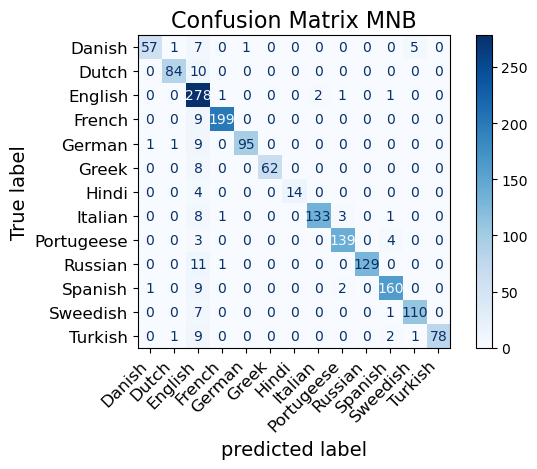

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_predmnb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= mnb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xlabel('predicted label', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.title('Confusion Matrix MNB', fontsize = 16)
plt.xticks(rotation = 45, ha = "right", fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.show()

In [9]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
accuracy = accuracy_score(y_test, y_predmnb)
precision = precision_score(y_test, y_predmnb, average = None)
recall = recall_score(y_test, y_predmnb, average = None)
print("Accuracy:", accuracy)
report_df = pd.DataFrame({
    'Class': mnb.classes_,
    'Precision':precision,
    'Recall':recall
})

print('Classification Report')
print(report_df.to_string(index = False))

Accuracy: 0.9242788461538461
Classification Report
     Class  Precision   Recall
    Danish   0.966102 0.802817
     Dutch   0.965517 0.893617
   English   0.747312 0.982332
    French   0.985149 0.956731
    German   0.989583 0.896226
     Greek   1.000000 0.885714
     Hindi   1.000000 0.777778
   Italian   0.985185 0.910959
Portugeese   0.958621 0.952055
   Russian   1.000000 0.914894
   Spanish   0.946746 0.930233
  Sweedish   0.948276 0.932203
   Turkish   1.000000 0.857143


Now, let's evaluate on Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial')
lr.fit(x_train, y_train)

y_predLR = lr.predict(x_test)

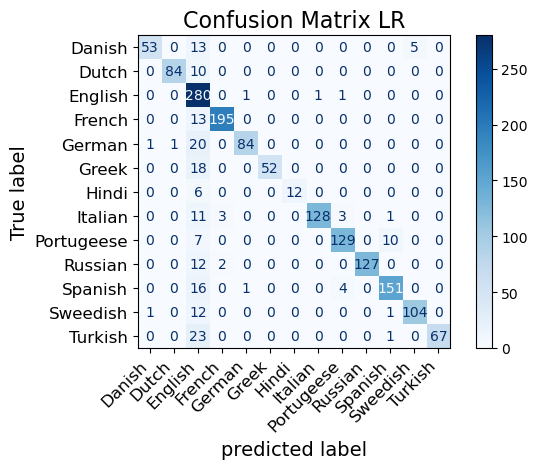

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_predLR)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= lr.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xlabel('predicted label', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.title('Confusion Matrix LR', fontsize = 16)
plt.xticks(rotation = 45, ha = "right", fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.show()

In [12]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
accuracy = accuracy_score(y_test, y_predLR)
precision = precision_score(y_test, y_predLR, average = None)
recall = recall_score(y_test, y_predLR, average = None)
print("Accuracy:", accuracy)
report_df = pd.DataFrame({
    'Class': mnb.classes_,
    'Precision':precision,
    'Recall':recall
})

print('Classification Report')
print(report_df.to_string(index = False))

Accuracy: 0.8810096153846154
Classification Report
     Class  Precision   Recall
    Danish   0.963636 0.746479
     Dutch   0.988235 0.893617
   English   0.634921 0.989399
    French   0.975000 0.937500
    German   0.976744 0.792453
     Greek   1.000000 0.742857
     Hindi   1.000000 0.666667
   Italian   0.992248 0.876712
Portugeese   0.941606 0.883562
   Russian   1.000000 0.900709
   Spanish   0.920732 0.877907
  Sweedish   0.954128 0.881356
   Turkish   1.000000 0.736264


Now Lets use a Artificial Neural Network

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizerANN = TfidfVectorizer(max_features = 5000)
x_vectorizedANN = vectorizer.fit_transform(x).toarray()
x_train, x_test, y_train, y_test = train_test_split(x_vectorizedANN, y, test_size=0.2, random_state=42, shuffle=True)

Encoding categorical Labels

In [14]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)

Building the ANN Model

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

from tensorflow.keras import backend as k
k.clear_session()

ANN = Sequential([
    Dense(64, input_shape=(x_train.shape[1],), activation = 'relu'),
    Dropout(0.3),
    Dense(64, activation = 'relu'),
    Dropout(0.3),
    Dense(y_train_onehot.shape[1], activation = 'softmax')
])

ANN.summary()

/home/fcsvmuser/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │     1,991,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 13)             │           845 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,996,941 (7.62 MB)

 Trainable params: 1,996,941 (7.62 MB)

 Non-trainable params: 0 (0.00 B)

Compiling the Model

In [16]:
ANN.compile(optimizer='adam',
            loss = 'categorical_crossentropy',
            metrics=['accuracy'])

Training the Model

In [17]:
history = ANN.fit(x_train, y_train_onehot, 
                  epochs=10,
                  batch_size=8,
                  validation_data = (x_test, y_test_onehot))

Epoch 1/10


2024-11-11 14:07:54.683705: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1656739536 exceeds 10% of free system memory.


828/832 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3733 - loss: 1.9628

2024-11-11 14:08:06.450675: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 414309376 exceeds 10% of free system memory.


832/832 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.3747 - loss: 1.9591 - val_accuracy: 0.9002 - val_loss: 0.4948
Epoch 2/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9313 - loss: 0.3273 - val_accuracy: 0.9207 - val_loss: 0.3260
Epoch 3/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9781 - loss: 0.1170 - val_accuracy: 0.9255 - val_loss: 0.2946
Epoch 4/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9851 - loss: 0.0755 - val_accuracy: 0.9237 - val_loss: 0.2901
Epoch 5/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9859 - loss: 0.0575 - val_accuracy: 0.9219 - val_loss: 0.2950
Epoch 6/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9869 - loss: 0.0482 - val_accuracy: 0.9189 - val_loss: 0.3169
Epoch 7/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9877 - loss: 0.0431 - val_accuracy: 0.9111 - val_loss: 0.3356
Epoch 8/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9901 - loss: 0.0399 - val_accuracy: 0.91

Confusion Matrix

36/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

2024-11-11 14:09:32.346865: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 414309376 exceeds 10% of free system memory.


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


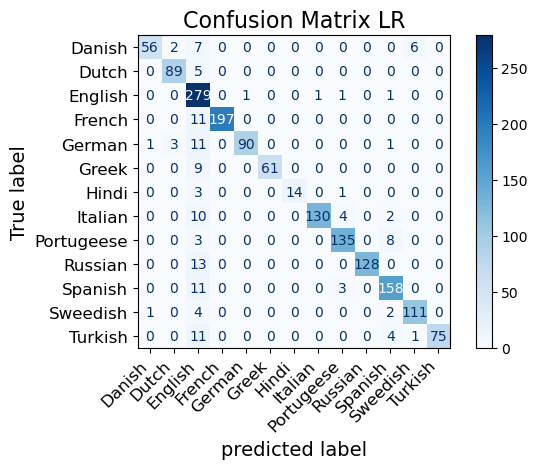

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_onehot = ANN.predict(x_test)
y_predANN = np.argmax(y_pred_onehot, axis =1)
y_test_lables = np.argmax(y_test_onehot, axis =1)

cm = confusion_matrix(y_test_lables, y_predANN)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xlabel('predicted label', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.title('Confusion Matrix LR', fontsize = 16)
plt.xticks(rotation = 45, ha = "right", fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.show()

Evaluation

In [19]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
accuracy = accuracy_score(y_test_lables, y_predANN)
precision = precision_score(y_test_lables, y_predANN, average = None)
recall = recall_score(y_test_lables, y_predANN, average = None)
print("Accuracy:", accuracy)
report_df = pd.DataFrame({
    'Class': label_encoder.classes_,
    'Precision':precision,
    'Recall':recall
})

print('Classification Report')
print(report_df.to_string(index = False))

Accuracy: 0.9152644230769231
Classification Report
     Class  Precision   Recall
    Danish   0.965517 0.788732
     Dutch   0.946809 0.946809
   English   0.740053 0.985866
    French   1.000000 0.947115
    German   0.989011 0.849057
     Greek   1.000000 0.871429
     Hindi   1.000000 0.777778
   Italian   0.992366 0.890411
Portugeese   0.937500 0.924658
   Russian   1.000000 0.907801
   Spanish   0.897727 0.918605
  Sweedish   0.940678 0.940678
   Turkish   1.000000 0.824176
